<a href="https://colab.research.google.com/github/Aarav-H/FM-Assignment/blob/main/regression-notebooks/MRPL_Beta_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

In [ ]:
#Download stock prices for the security monthly data last 5 years
MRPL_df = yf.download('MRPL.NS',
                      start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo'
)
MRPL_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,71.849998,72.500000,60.250000,63.299999,61.952057,39400971
2019-06-01,64.000000,64.800003,57.799999,60.400002,60.061909,19216005
2019-07-01,60.700001,62.700001,53.000000,59.849998,59.514988,8166167
2019-08-01,59.000000,59.000000,43.000000,45.950001,45.692795,6457090
2019-09-01,45.950001,52.900002,44.500000,48.500000,48.228519,11362553


In [ ]:
#Download Market index closing prices
NIFTY_df = yf.download('^NSEI',start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo',
)
NIFTY_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,11725.549805,12041.150391,11108.299805,11922.799805,11922.799805,8645600
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000


In [ ]:
#Calculate Log returns(HPCL)
MRPL_df['Return_MRPL'] = np.log(MRPL_df['Adj Close']/MRPL_df['Adj Close'].shift(1))
print(MRPL_df['Return_MRPL'])

Date
2019-05-01         NaN
2019-06-01   -0.030985
2019-07-01   -0.009148
2019-08-01   -0.264288
2019-09-01    0.054010
2019-10-01    0.119385
2019-11-01   -0.137067
2019-12-01   -0.058332
2020-01-01    0.024177
2020-02-01   -0.192142
2020-03-01   -0.495591
2020-04-01    0.337706
2020-05-01   -0.122803
2020-06-01    0.244516
2020-07-01   -0.006845
2020-08-01   -0.131963
2020-09-01   -0.216115
2020-10-01    0.117351
2020-11-01    0.020549
2020-12-01    0.183733
2021-01-01    0.012614
2021-02-01    0.116854
2021-03-01   -0.037883
2021-04-01    0.107289
2021-05-01    0.129912
2021-06-01    0.040781
2021-07-01   -0.137717
2021-08-01   -0.039937
2021-09-01    0.083707
2021-10-01    0.051133
2021-11-01   -0.101637
2021-12-01   -0.029717
2022-01-01    0.062942
2022-02-01   -0.132598
2022-03-01    0.034233
2022-04-01    0.572581
2022-05-01    0.095618
2022-06-01    0.110155
2022-07-01   -0.218738
2022-08-01    0.002743
2022-09-01   -0.207007
2022-10-01   -0.093543
2022-11-01    0.085082
2022-1

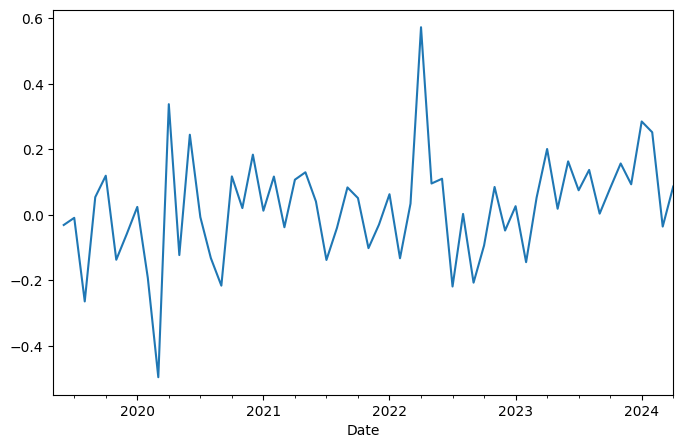

In [ ]:
MRPL_df['Return_MRPL'].plot(figsize=(8,5))
plt.show()

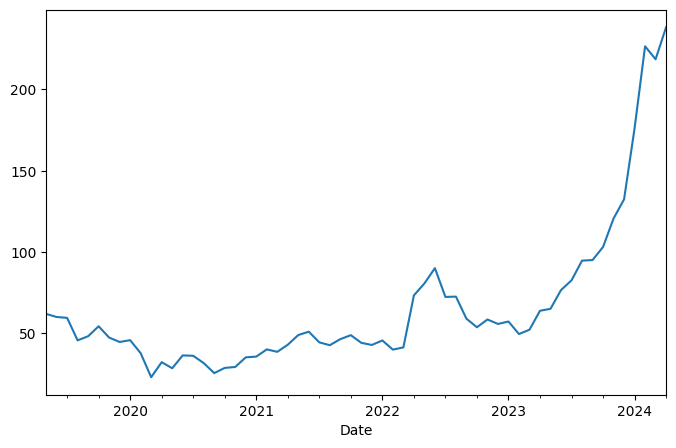

In [ ]:
MRPL_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
MRPL_df1 = MRPL_df.dropna(axis=0)
MRPL_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_MRPL
Date,,,,,,,
2019-06-01,64.000000,64.800003,57.799999,60.400002,60.061909,19216005,-0.030985
2019-07-01,60.700001,62.700001,53.000000,59.849998,59.514988,8166167,-0.009148
2019-08-01,59.000000,59.000000,43.000000,45.950001,45.692795,6457090,-0.264288
2019-09-01,45.950001,52.900002,44.500000,48.500000,48.228519,11362553,0.054010
2019-10-01,49.250000,55.500000,47.650002,54.650002,54.344097,13480805,0.119385


In [ ]:
#Caclulate log returns(NIFTY50)
NIFTY_df['Return_NIFTY'] = np.log(NIFTY_df['Adj Close']/NIFTY_df['Adj Close'].shift(1))
print(NIFTY_df['Return_NIFTY'])

Date
2019-05-01         NaN
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
2019-11-01    0.014925
2019-12-01    0.009280
2020-01-01   -0.017103
2020-02-01   -0.065673
2020-03-01   -0.264569
2020-04-01    0.136976
2020-05-01   -0.028767
2020-06-01    0.072639
2020-07-01    0.072203
2020-08-01    0.027966
2020-09-01   -0.012366
2020-10-01    0.034503
2020-11-01    0.107904
2020-12-01    0.075195
2021-01-01   -0.025142
2021-02-01    0.063546
2021-03-01    0.011058
2021-04-01   -0.004065
2021-05-01    0.063018
2021-06-01    0.008861
2021-07-01    0.002639
2021-08-01    0.083291
2021-09-01    0.027970
2021-10-01    0.003032
2021-11-01   -0.039737
2021-12-01    0.021601
2022-01-01   -0.000819
2022-02-01   -0.031992
2022-03-01    0.039169
2022-04-01   -0.020957
2022-05-01   -0.030756
2022-06-01   -0.049712
2022-07-01    0.083720
2022-08-01    0.034430
2022-09-01   -0.038161
2022-10-01    0.052301
2022-11-01    0.040590
2022-1

In [ ]:
NIFTY_df1 = NIFTY_df.dropna(axis=0)
NIFTY_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000,-0.011298
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500,-0.058589
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100,-0.008559
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000,0.040116
2019-10-01,11515.400391,11945.000000,11090.150391,11877.450195,11877.450195,15461000,0.034519


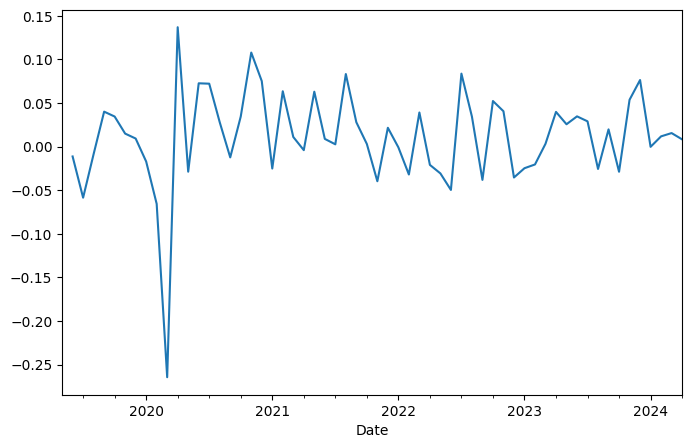

In [ ]:
NIFTY_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

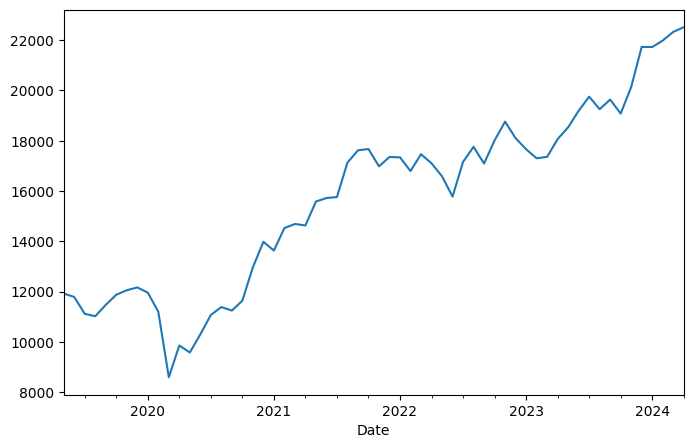

In [ ]:
NIFTY_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
MRPL_df1_returns = MRPL_df1['Return_MRPL']
MRPL_df1_returns.head()


Date
2019-06-01   -0.030985
2019-07-01   -0.009148
2019-08-01   -0.264288
2019-09-01    0.054010
2019-10-01    0.119385
Name: Return_MRPL, dtype: float64

In [ ]:
NIFTY_df1_returns = NIFTY_df1['Return_NIFTY']
NIFTY_df1_returns.head()

Date
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
Name: Return_NIFTY, dtype: float64

In [ ]:
returns = pd.merge(NIFTY_df1_returns,MRPL_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_MRPL
count,59.000000,59.000000
mean,0.010774,0.022830
std,0.055822,0.162982
min,-0.264569,-0.495591
25%,-0.020723,-0.053094
50%,0.011058,0.026387
75%,0.039495,0.108722
max,0.136976,0.572581


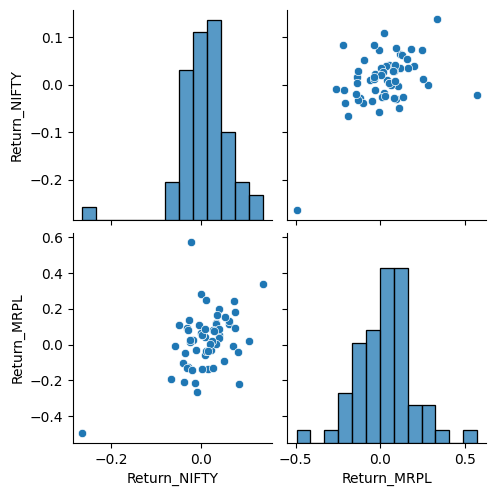

In [ ]:
sns.pairplot(returns)
plt.show()

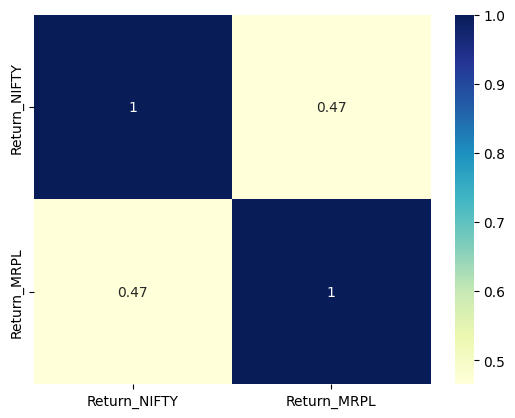

In [ ]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_MRPL']
x_sm = sm.add_constant(x)

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [ ]:
#Regression - Market model
model = sm.OLS(y,x_sm)

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
results = model.fit()

In [ ]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_MRPL   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     15.74
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           0.000206
Time:                        18:54:06   Log-Likelihood:                 31.012
No. Observations:                  59   AIC:                            -58.02
Df Residuals:                      57   BIC:                            -53.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0082      0.019      0.425      0.673      -0.030       0.047
Return_NIFTY     1.3580      0.342      3.967      0.000       0.673       2.044
==============================================================================
Omnibus:                       18.833   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.412
Skew:                           0.929   Prob(JB):                     2.77e-09
Kurtosis:                       6.547   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Beta for MRPL stock = 1.3580 and significant at 5%


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-06-01 to 2024-04-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  59 non-null     float64
 1   Return_MRPL   59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


<Axes: xlabel='Return_NIFTY', ylabel='Return_MRPL'>

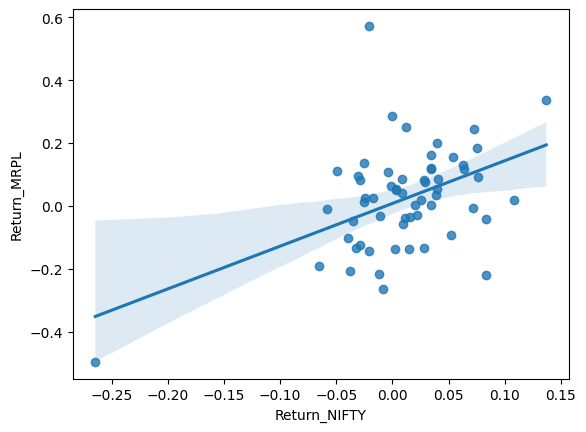

In [ ]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_MRPL', data = returns)

In [ ]:
print('resid', results.resid)

resid Date
2019-06-01   -0.023839
2019-07-01    0.062221
2019-08-01   -0.260862
2019-09-01   -0.008668
2019-10-01    0.064309
2019-11-01   -0.165533
2019-12-01   -0.079133
2020-01-01    0.039206
2020-02-01   -0.111152
2020-03-01   -0.144491
2020-04-01    0.143488
2020-05-01   -0.091934
2020-06-01    0.137671
2020-07-01   -0.113097
2020-08-01   -0.178140
2020-09-01   -0.207519
2020-10-01    0.062295
2020-11-01   -0.134189
2020-12-01    0.073417
2021-01-01    0.038560
2021-02-01    0.022357
2021-03-01   -0.061098
2021-04-01    0.104612
2021-05-01    0.036132
2021-06-01    0.020549
2021-07-01   -0.149500
2021-08-01   -0.161248
2021-09-01    0.037525
2021-10-01    0.038817
2021-11-01   -0.055870
2021-12-01   -0.067250
2022-01-01    0.055856
2022-02-01   -0.097350
2022-03-01   -0.027158
2022-04-01    0.592843
2022-05-01    0.129188
2022-06-01    0.169469
2022-07-01   -0.340632
2022-08-01   -0.052213
2022-09-01   -0.163380
2022-10-01   -0.172768
2022-11-01    0.021761
2022-12-01   -0.007933


<ipython-input-29-a89ebdceef41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid)


count    5.900000e+01
mean     1.293692e-17
std      1.442778e-01
min     -3.406321e-01
25%     -9.464210e-02
50%      2.054891e-02
75%      6.555093e-02
max      5.928433e-01
dtype: float64

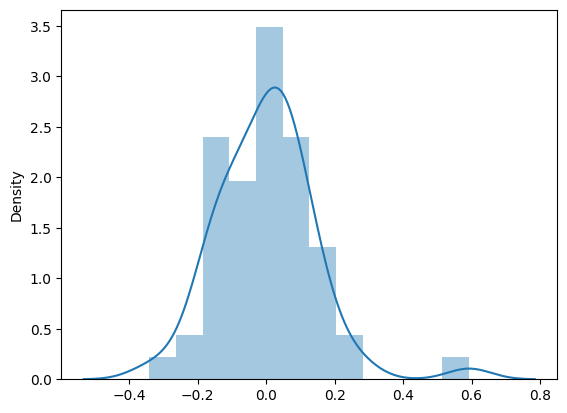

In [ ]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 0.18207884303921962, 'Test Statistic p-value': 0.9129817190631025, 'F-Statistic': 0.08667779317621838, 'F-Test p-value': 0.9170952800939173}


#The errors are homoskedastic as per the White test


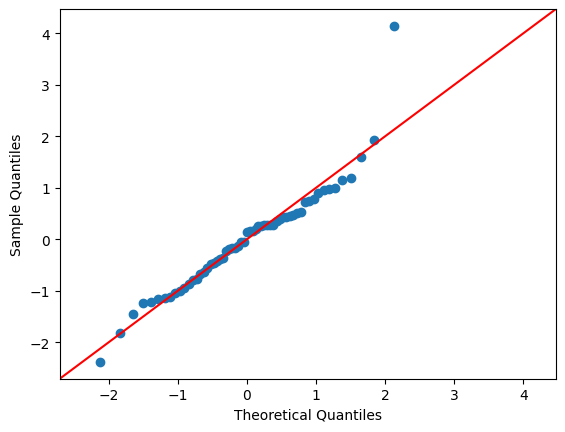

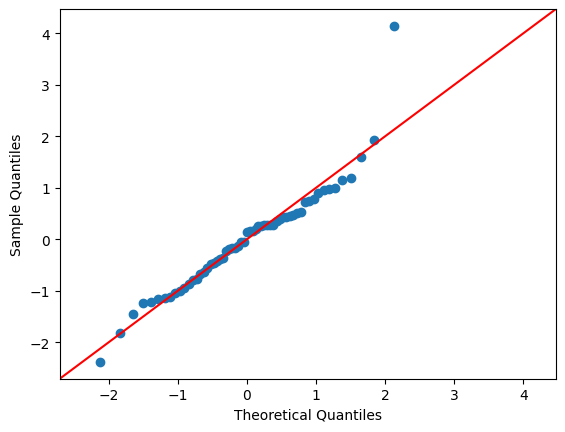

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

In [ ]:
stats.normaltest(results.resid)

NormaltestResult(statistic=11.089948934958652, pvalue=0.003907042959380709)

We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line.
The D’Agostino’s K-squared test result suggests that the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.